In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data= pd.read_csv("F:\Dataset\Breast_cancer_data.csv")

In [16]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [20]:

data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [21]:
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E1CC47CC50>,
      dtype=object)

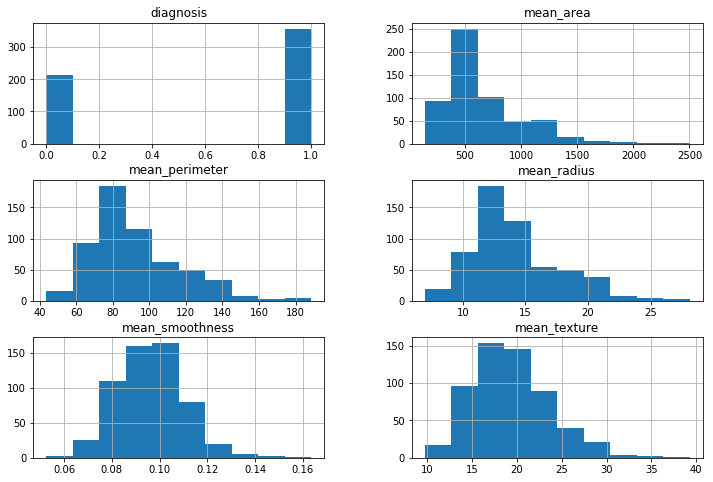

In [25]:
data.hist(figsize=(12,8))

In [27]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


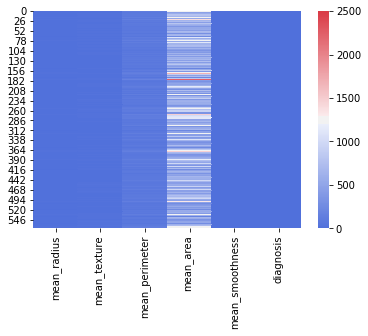

In [31]:
cmap = sb.diverging_palette(260, 10, as_cmap=True)
sb.heatmap(data, cmap=cmap, )

#### Analyzing mean and standard deviation of variables by sample diagnosis

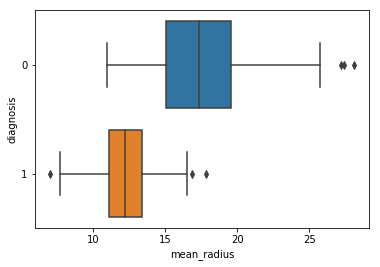

In [35]:
sb.boxplot(data.mean_radius, data.diagnosis, orient="h")

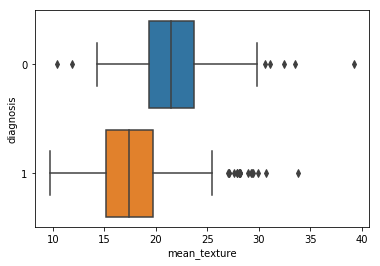

In [37]:
sb.boxplot(data.mean_texture, data.diagnosis, orient="h")

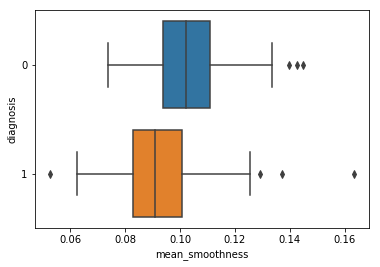

In [39]:
sb.boxplot(data.mean_smoothness, data.diagnosis, orient="h")

#### Independent/Dependent Variables Split

In [51]:
y=data.diagnosis
X=data.drop(['diagnosis'], axis=1)
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

#### Train/Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=2)

#### Classifiers

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [63]:
Classifier= DecisionTreeClassifier()

In [66]:
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
y_pred=Classifier.predict(X_test)

In [71]:
Accuracy=accuracy_score(y_test, y_pred, normalize=True)

In [73]:
Accuracy

0.8741258741258742

#### Plotting ROC curve`

In [75]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [86]:
def make_roc_curve(X, y, classifier):
    n_sample, n_feature=X.shape

cv=StratifiedKFold(n_splits=12)

In [87]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0, 1 ,100)
from scipy import interp

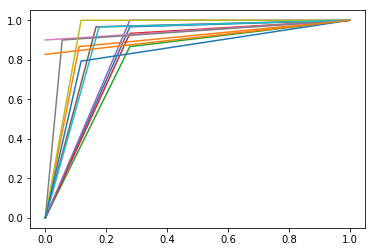

In [89]:
i=0
for train, test in cv.split(X, y):
    probas=Classifier.fit(X.loc[train], y.loc[train]).predict(X.loc[test])
    fpr, tpr, threshold=roc_curve(y.loc[test], probas)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc=auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr)

In [91]:
from sklearn.datasets import load_iris

In [94]:
iris=load_iris()

In [96]:
X=iris.data
y=iris.target

In [167]:
X_train, X_test, y_train, y_test=train_test_split(X, y,random_state=3)

In [100]:
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
y_pred=Classifier.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred)

0.9473684210526315

#### Dealing with overfitting 

In [156]:
Classifier=DecisionTreeClassifier(min_samples_split=4, random_state=4)

In [157]:
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

In [158]:
y_pred=Classifier.predict(X_test)

In [159]:
accuracy_score(y_test, y_pred)

0.9473684210526315

#### Using GridSearchCV for optimizing parameters

In [178]:
from sklearn.model_selection import GridSearchCV
sample_split_range=list(range(2,10))

In [197]:
Param_grid=dict(min_sample=sample_split_range)

In [198]:
Param_grid


{'min_sample': [2, 3, 4, 5, 6, 7, 8, 9]}

In [200]:
Classifier.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 4,
 'splitter': 'best'}

In [204]:
grid=GridSearchCV(Classifier, cv=10, param_grid=Param_grid)

In [203]:
grid.fit(X_train, y_train)

ValueError: Invalid parameter min_sample for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.